<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 

In [2]:
df = pd.read_csv('data/Churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [6]:
df.columns = df.columns.str.lower()

In [7]:
df['tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: tenure, dtype: float64

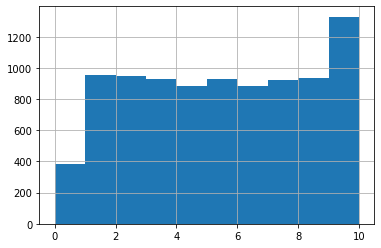

In [8]:
df.loc[df['tenure'].notna()]['tenure'].hist()

In [9]:
df["tenure"] = df["tenure"].fillna(method="pad")

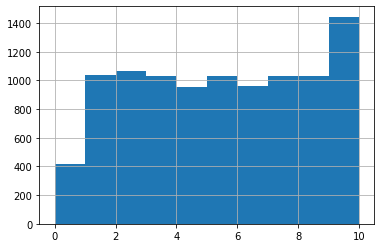

In [10]:
df['tenure'].hist()

In [11]:
df['tenure'].count()

10000

In [12]:
df.describe()

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.992700,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.891588,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Как видим распределения схожи, поэтому перейдем к следующему шагу

Удалим неинформативные столбцы

In [13]:
df = df.drop(['rownumber','customerid','surname'], axis=1)

In [14]:
df.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Для кодирования строковых столбцов применим OrdinalEncoder

In [15]:
encoder = OrdinalEncoder()
encoder.fit(df[['gender','geography']])
df[['gender','geography']] = encoder.transform(df[['gender','geography']])

In [16]:
df.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,0.0,0.0,42,2.0,0.00,1,1,1,101348.88,1
1,608,2.0,0.0,41,1.0,83807.86,1,0,1,112542.58,0
2,502,0.0,0.0,42,8.0,159660.80,3,1,0,113931.57,1
3,699,0.0,0.0,39,1.0,0.00,2,0,0,93826.63,0
4,850,2.0,0.0,43,2.0,125510.82,1,1,1,79084.10,0


In [17]:
df.shape

(10000, 11)

## Исследование задачи

In [18]:
features = df.drop(['exited'],axis=1)
target = df['exited']


In [19]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=12345,stratify = target)

In [20]:
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345,stratify = target_valid)

In [21]:
print('Размер обучающей выборки:', features_train.shape[0])
print('Размер валидационной выборки:', features_valid.shape[0])
print('Размер тестовой выборки:',features_test.shape[0])

Размер обучающей выборки: 6000
Размер валидационной выборки: 2000
Размер тестовой выборки: 2000


Обучим модель дерева решений

In [22]:
df['exited'].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

In [23]:
def classifier(classifier,features_train=features_train, target_train=target_train,features_valid=features_valid,target_valid=target_valid):
    model=classifier
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1_valid = f1_score(target_valid,predicted_valid)
    accuracy_valid=accuracy_score(target_valid,predicted_valid)
    recall_valid = recall_score(target_valid,predicted_valid)
    precision_valid = precision_score(target_valid,predicted_valid)
    print('f1       : ', f1_valid)
    print('Accuracy : ',accuracy_valid) 
    print('Recall   : ',recall_valid)
    print('Precision:', precision_valid)
    print('Confusion_matrix \n',confusion_matrix(target_valid, predicted_valid))

In [24]:
dummy = DummyClassifier(strategy='most_frequent', random_state=12345)
dummy.fit(features_train, target_train)
dummy.score(features_test, target_test)

0.7965

In [25]:
target_pred_constant = pd.Series([0 for x in range(len(target.index))])
print('Accuracy constant: ',accuracy_score(target, target_pred_constant)) 

Accuracy constant:  0.7963


In [26]:
classifier(DecisionTreeClassifier(random_state=12345))

f1       :  0.5193889541715628
Accuracy :  0.7955
Recall   :  0.5416666666666666
Precision: 0.49887133182844245
Confusion_matrix 
 [[1370  222]
 [ 187  221]]


In [27]:
classifier(LogisticRegression(random_state=12345, solver='liblinear'))

f1       :  0.06263982102908278
Accuracy :  0.7905
Recall   :  0.03431372549019608
Precision: 0.358974358974359
Confusion_matrix 
 [[1567   25]
 [ 394   14]]


In [28]:
classifier(RandomForestClassifier(random_state=12345))

f1       :  0.5735735735735735
Accuracy :  0.858
Recall   :  0.4681372549019608
Precision: 0.7403100775193798
Confusion_matrix 
 [[1525   67]
 [ 217  191]]


Как видно из проверки на адекватность, точность прогноза в случае заполнения нулями или с использованием DummyClassifier выше, чем у моделей DecisionTreeClassifier и LogisticRegression, метрика f1 у всех моделей кроме логистической (0.08) составляет ~ 0.5. Точность прогноза константной модели сопоставима с точностью наших моделей, это связано с имеющимся дисбалансом данных(0 в 4 раза больше чем 1). Для улучшения показателей метрик проведем работу по снижению дисбаланса в данных.

## Борьба с дисбалансом

**Взвешивание классов**

In [29]:
classifier(LogisticRegression(random_state=12345, solver='liblinear',class_weight='balanced'))

f1       :  0.47704918032786886
Accuracy :  0.681
Recall   :  0.7132352941176471
Precision: 0.3583743842364532
Confusion_matrix 
 [[1071  521]
 [ 117  291]]


Для логистической регрессии добавление весовых коэффициентов позволило поднять метрику f1 до 0.53

In [30]:
classifier(DecisionTreeClassifier(random_state=12345,class_weight='balanced'))

f1       :  0.5049261083743842
Accuracy :  0.799
Recall   :  0.5024509803921569
Precision: 0.5074257425742574
Confusion_matrix 
 [[1393  199]
 [ 203  205]]


Для DecisionTreeClassifier введение весовых коэффициентов практически не изменило показатели метрики

In [31]:
classifier(RandomForestClassifier(random_state=12345,class_weight='balanced'))

f1       :  0.5390505359877489
Accuracy :  0.8495
Recall   :  0.43137254901960786
Precision: 0.7183673469387755
Confusion_matrix 
 [[1523   69]
 [ 232  176]]


Для модели случайного леса весовые коэффициенты так-же не существенны

**Увеличение выборки**

In [32]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled_train, target_upsampled_train = upsample(features_train, target_train, repeat=int(target_train.value_counts()[0]/target_train.value_counts()[1]))


In [33]:
print(features_upsampled_train.shape)
print(features_train.shape)

(8444, 10)
(6000, 10)


In [34]:
classifier(LogisticRegression(random_state=12345, solver='liblinear'),features_upsampled_train, target_upsampled_train)

f1       :  0.4473953013278856
Accuracy :  0.7295
Recall   :  0.5367647058823529
Precision: 0.38353765323992994
Confusion_matrix 
 [[1240  352]
 [ 189  219]]


In [35]:
classifier(DecisionTreeClassifier(random_state=12345),features_upsampled_train, target_upsampled_train)

f1       :  0.5319148936170214
Accuracy :  0.802
Recall   :  0.5514705882352942
Precision: 0.5136986301369864
Confusion_matrix 
 [[1379  213]
 [ 183  225]]


In [36]:
classifier(RandomForestClassifier(random_state=12345),features_upsampled_train, target_upsampled_train)

f1       :  0.5952045133991539
Accuracy :  0.8565
Recall   :  0.5171568627450981
Precision: 0.7009966777408638
Confusion_matrix 
 [[1502   90]
 [ 197  211]]


Увеличение выборки уменьшило показание f1 для логистической регрессии, дало прирост на 0.03 для DecisionTreeClassifier, для random forest показатель f1 увеличился на 0.06

**Уменьшение выборки**

In [37]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled_train, target_downsampled_train = downsample(features_train, target_train, target_train.value_counts()[1]/target_train.value_counts()[0])
print(target_train.value_counts()[1]/target_train.value_counts()[0])

0.25575554625366265


In [38]:
print(features_downsampled_train.shape)
print(features_train.shape)

(2444, 10)
(6000, 10)


In [39]:
classifier(LogisticRegression(random_state=12345, solver='liblinear'),features_downsampled_train, target_downsampled_train)

f1       :  0.47320692497938993
Accuracy :  0.6805
Recall   :  0.7034313725490197
Precision: 0.3565217391304348
Confusion_matrix 
 [[1074  518]
 [ 121  287]]


In [40]:
classifier(DecisionTreeClassifier(random_state=12345),features_downsampled_train, target_downsampled_train)

f1       :  0.5029535864978903
Accuracy :  0.7055
Recall   :  0.7303921568627451
Precision: 0.3835263835263835
Confusion_matrix 
 [[1113  479]
 [ 110  298]]


In [41]:
classifier(RandomForestClassifier(random_state=12345),features_downsampled_train, target_downsampled_train)

f1       :  0.5823293172690763
Accuracy :  0.792
Recall   :  0.7107843137254902
Precision: 0.4931972789115646
Confusion_matrix 
 [[1294  298]
 [ 118  290]]


Наилучшие показатели метрик приходятся на модель random forest

*Таким образом для для дальнейшего переобучения можно выбрать модель random forest с увеличением выборки

## Тестирование модели

Подготовим нашу модель и подберем оптимальные гиперпараметры и проверим на валидационной выборке

In [42]:
features_upsampled_train, target_upsampled_train = upsample(features_train, target_train, repeat=int(target_train.value_counts()[0]/target_train.value_counts()[1]))

In [43]:
%%time
forest_model = None
best_acc = 0
best_depth=0
best_est=0
best_sample=0
best_f1=0
for est in range(1, 50):
    for depth in range(1,10):
        for sample in range(1,5):
            model = RandomForestClassifier(random_state=12345, n_estimators=est,max_depth = depth,min_samples_leaf=sample,class_weight='balanced') 
            model.fit(features_upsampled_train,target_upsampled_train) 
            predicted_valid = model.predict(features_valid)
            f1_valid = f1_score(target_valid,predicted_valid)
            accuracy_valid=accuracy_score(target_valid,predicted_valid)
            if f1_valid > best_f1:
                forest_model = model
                best_acc = accuracy_valid 
                best_depth=depth
                best_est=est
                best_sample=sample
                best_f1=f1_valid

print("Accuracy:", best_acc,'Depth:',best_depth,'Est:',best_est,'Sample:',best_sample,'f1:',best_f1)

Accuracy: 0.834 Depth: 8 Est: 44 Sample: 2 f1: 0.6505263157894736
CPU times: user 5min 38s, sys: 894 ms, total: 5min 39s
Wall time: 5min 39s


Объединим валидационную и тренировочную выборки и проверим модель на тестовой выборке

In [44]:
features_tv = pd.concat([features_train,features_valid])
target_tv = pd.concat([target_train,target_valid])

In [45]:
features_upsampled_train, target_upsampled_train = upsample(features_tv, target_tv, repeat=int(target_tv.value_counts()[0]/target_tv.value_counts()[1]))

In [46]:
%%time
model_up = RandomForestClassifier(random_state=12345, n_estimators=44,max_depth = 8,min_samples_leaf=2)
model_up.fit(features_upsampled_train,target_upsampled_train) 
predicted_test = model_up.predict(features_test)
f1_test = f1_score(target_test,predicted_test)
accuracy_test = accuracy_score(target_test,predicted_test)
recall_test = recall_score(target_test,predicted_test)
precision_test = precision_score(target_test,predicted_test)
print('f1       : ', f1_test)
print('Accuracy : ',accuracy_test) 
print('Recall   : ',recall_test)
print('Precision:', precision_test)
print('Confusion_matrix \n',confusion_matrix(target_test,predicted_test))

f1       :  0.6171967020023557
Accuracy :  0.8375
Recall   :  0.6437346437346437
Precision: 0.5927601809954751
Confusion_matrix 
 [[1413  180]
 [ 145  262]]
CPU times: user 592 ms, sys: 8 ms, total: 600 ms
Wall time: 621 ms


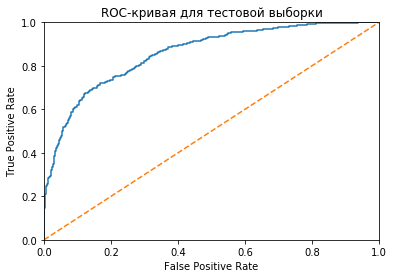

auc_roc: 0.8580737902771801


In [47]:
probabilities_test = model_up.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для тестовой выборки')
plt.show() 
auc_roc = roc_auc_score(target_test,probabilities_one_test)
print('auc_roc:',auc_roc)

В результате подбора гиперпараметров RandomForestClassifier со значениями Depth: 8 Est: 44 Sample: 2, метрика f1 на валидационной выборке составила 0.65, на тестовой выборке значения метрики f1 - 0.617, Accuracy -0.84.
По roc-кривой видно, что наша модель отличается от случайной.

**ВЫВОДЫ**

В результате проделанной работы, мы нивелировали дисбаланс в выборке, который приводил к ложным показателям точности моделей. За счет увеличения выборки достигли приемлимых показателей метрик. За счет подбора гиперпараметров улучшили данные показатели. По итогу выбрали наилучшую модель - модель случайного леса с гиперпараметрами: Depth: 8 Est: 44 Sample: 2. Модель обучилась за 583 ms. Итоговые показатели метрик на тестовой выборке:

f1       :  0.617,
Accuracy :  0.838,
Recall   :  0.644,
Precision:  0.593

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*